In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import geojson
from ipywidgets import HTML

In [2]:
from ipyleaflet import *

In [3]:
filein = h5py.File('./aot_chicago_data.h5',mode='r')

In [4]:
nodes = {}

for item in filein:
    if isinstance(filein[item], h5py.Group):
        nodes[item] = {'lon':None, "lat":None, "address":None}
    for attr in filein[item].attrs:
        if attr == "address":
            nodes[item][attr] = filein[item].attrs[attr].replace("_", " ")
        else:
            nodes[item][attr] = filein[item].attrs[attr]

In [5]:
for i, item in enumerate(nodes, 0):
    if i == 0:
        xll = nodes[item]['lon']
        yll = nodes[item]['lat']
        xur = nodes[item]['lon']
        yur = nodes[item]['lat']
    else:
        xll = min(nodes[item]['lon'], xll)
        yll = min(nodes[item]['lat'], yll)
        xur = max(nodes[item]['lon'], xur)
        yur = max(nodes[item]['lat'], yur)

In [6]:
lon_c = xll + (xur-xll)/2
lat_c = yll + (yur-yll)/2

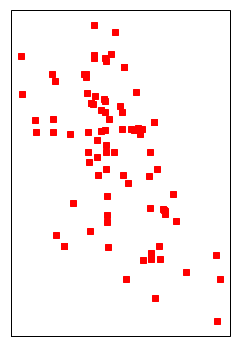

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines(linewidth=2)
for item in nodes:
    ax.plot(nodes[item]['lon'], nodes[item]['lat'], marker='s', markersize=6,
           mfc='r', mec='r', linestyle='')

In [8]:
import ipyleaflet as ipyl

In [9]:
m = Map(center=(lat_c, lon_c), zoom=10, basemap=basemaps.Esri.WorldTopoMap,
       zoom_control=True, touch_zoom=True)
tile1 = basemap_to_tiles(basemaps.OpenStreetMap.Mapnik,)
tile2 = basemap_to_tiles(basemaps.Esri.NatGeoWorldMap,)
#m.interact(zoom=(5,10,1))

In [14]:
for i, item in enumerate(nodes, 0):
    marker = Marker(location=(nodes[item]['lat'], nodes[item]['lon']),
                   draggable=False)
    message = HTML()
    message.placeholder = "Node ID<br/>Address"
    message.description = "Node ID<br/>Address"
    message.value = ("%s<br/>%s" % 
        (item.split("_")[1], nodes[item]['address']))

    popup = Popup(
        location=(nodes[item]["lat"],nodes[item]["lon"]),
        child=message,
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    marker.popup = message
    if i == 0:
        group = LayerGroup(layers=(marker,))
    else:
        group.add_layer(marker)

In [15]:
feature_collection = []
for i, item in enumerate(nodes, 0):
    point = Point(nodes[item]['lat'], nodes[item]['lon'])
    feature_collection.append(geojson.Feature(geometry=point, 
                                              properties={"Address":nodes[item]["address"],
                                                          "ID":item.split("_")[1]}))
fc = geojson.FeatureCollection(feature_collection)

In [16]:
m.clear_layers()
m.clear_controls()

In [17]:
m.add_layer(tile1)
m.add_layer(tile2)
m.add_layer(group)
#m.add_layer(GeoJSON(data=fc, style={'fillColor': 'blue'}))
m.add_control(LayersControl())
m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}', 'max_zoom': 20, 'attribution': 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community', 'name': 'Esri.WorldTopoMap'}, center=[42.01665183556825, -87.64961242675783], controls=(LayersControl(),), east=-87.06527709960939, layers=(TileLayer(max_zoom=19, min_zoom=1, name='OpenStreetMap.Mapnik', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), TileLayer(attribution='Tiles &copy; Esri &mdash; National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC', max_zoom=16, min_zoom=1, name='Esri.NatGeoWorldMap', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size'], url='http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'), LayerGroup(layers=(Marker(draggable=False, location=[41.916586000000002, -87.666405999999995], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='109416<br/>Elston and Cortland Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.954625999999998, -87.645246999999998], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='109f62<br/>LSD Marine Dr & Irving Park Rd Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.994596999999999, -87.655523000000002], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10b9e5<br/>Sheridan Rd & Granville Ave Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.96904, -87.659672], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10b9e9<br/>Broadway Ave & Lawrence Ave Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.722456999999999, -87.57535], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10ba15<br/>Jeffrey Ave & 95th St Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.891964000000002, -87.611603000000002], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10ba16<br/>Ohio St & Grand Ave Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.852179, -87.675825000000003], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10ba18<br/>Damen Ave & Cermak Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.858136000000002, -87.616055000000003], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10ba3b<br/>18th St & Lake Shore Dr Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.878377, -87.627678000000003], options=['alt', 'clickable', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'], popup=HTML(value='10ba46<br/>State St & Jackson Blvd Chicago IL', description='Node ID<br/>Address', placeholder='Node ID<br/>Address')), Marker(draggable=False, location=[41.881171999999